In [16]:
import os
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"

from qlpdb.graph.models import Graph as graph_Graph
from qlpdb.experiment.models import DWaveExperiment as experiment_Experiment
from qlpdb.data.models import Data as data_Data

from qlp.mds import graph_tools as gt
from qlp.mds.qubo import get_mds_qubo
from qlp.mds.mds_qlpdb import QUBO_to_Ising

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [50]:
# available graphs
# vertices = 4, 10, 50, 100
total_vertices = 50

10


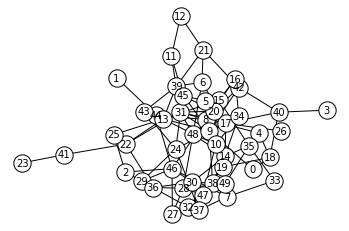

In [51]:
graphs = graph_Graph.objects.filter(total_vertices=total_vertices)
for idx, graph in enumerate(graphs):
    # plot graph
    adjacency_map = graph.adjacency
    gt.get_plot(adjacency_map, directed=False)
    print(graph.id)
    plt.show()

In [41]:
# Choose graph to read out
graph_id = 10

In [42]:
for idx, experiment in enumerate(experiment_Experiment.objects.filter(graph_id = graph_id)):
    print(experiment.id)
    print(experiment)

10
DWaveExperiment[Experiment](machine=Advantage_system1.1, settings={'num_reads': 1000, 'auto_scale': True, 'answer_mode': 'raw', 'annealing_time': 800, 'chain_strength': 64.0, 'readout_thermalization': 0, 'programming_thermalization': 1000, 'num_spin_reversal_transforms': 0}, settings_hash=385945f480f4ea1ec7944c9d6b3820b4, p=2.00, chain_strength=64.0, tag=FixEmbedding_Binary_0_0_z0)


In [43]:
# Choose experiment parameters
experiment_id = 10

In [44]:
# Print QUBO and Ising
penalty = float(experiment_Experiment.objects.get(id=experiment_id).p)
adjacency_map = {tuple(edge) for edge in graph_Graph.objects.get(id = graph_id).adjacency}
qubo = get_mds_qubo(adjacency_map, penalty=penalty, directed=False, triangularize=True, dtype="d")
print("QUBO formulation")
print(qubo.todense())
J, h, C = QUBO_to_Ising(qubo.todense().tolist())
print("Ising formulation")
print(J)
print(h)
print(C)
#data_Data.objects.filter(experiment_id = experiment_id)

QUBO formulation
[[-5.  0.  0. ...  0.  0.  0.]
 [ 0. -3.  0. ...  0.  0.  0.]
 [ 0.  0. -7. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 48.  0.  0.]
 [ 0.  0.  0. ...  0.  6.  8.]
 [ 0.  0.  0. ...  0.  0. 16.]]
Ising formulation
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 0.]]
[ 12.5   2.5   6.5   4.5   7.5  15.5  19.5   9.5  15.5  30.5  13.5   7.5
   6.5  23.5  26.5  16.5  16.5  29.5  14.5  24.5  17.5  15.5  11.5   2.5
  19.5   4.5   8.5  15.5  15.5   5.5   9.5  26.5  14.5   9.5  14.5  11.5
  18.5   8.5  12.5  20.5  19.5   6.5  24.5   8.5   9.5  11.5  19.5  17.5
  23.5  11.5  -2.   -4.   -1.   -1.   -2.   -1.   -2.   -4.   -1.   -2.
  -4.   -8.  -16.   -4.   -8.  -16.   -2.   -4.   -8.   -7.  -14.  -28.
 -56.   -4.   -8.  -16.   -1.   -2.   -2.   -4.   -2.   -4.   -8.   -1.
  -2.   -4.   -4.   -8.  -16.   -4.   -8.  -16.   -8.  -16.  -32.  -64.
  -4.   -8.  -16.   -3.   -6.  -12.  

<BarContainer object of 214 artists>

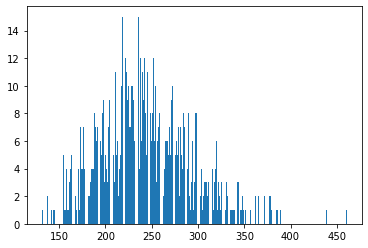

In [45]:
# get data
energy = dict()
for row in data_Data.objects.filter(experiment_id = experiment_id):
    if row.energy in energy:
        energy[row.energy] += 1
    else:
        energy[row.energy] = 1
x = np.sort(list(energy.keys()))
y = [energy[i] for i in x]
plt.bar(x=x, height=y)